In [1]:
import os
os.makedirs("Lab_2.1", exist_ok=True)

In [2]:
os.makedirs("Lab_2.1/output", exist_ok=True)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

from tensorflow.keras.applications.vgg16 import preprocess_input

In [5]:
image_path = "dog.webp"

Image loaded successfully!


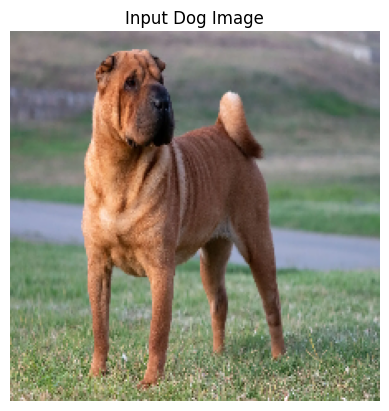

In [6]:
# Read the image
img = cv2.imread(image_path)

# Check if image loaded properly
if img is None:
    print("Error: Image not found!")
else:
    print("Image loaded successfully!")

# Convert BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Resize to 224x224
img = cv2.resize(img, (224, 224))

# Show image
plt.imshow(img)
plt.title("Input Dog Image")
plt.axis("off")
plt.show()

# Prepare for VGG16
img_array = np.expand_dims(img, axis=0)
img_array = preprocess_input(img_array)

In [7]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

# Load pre-trained VGG16 (without top layer)
base_model = VGG16(weights='imagenet', include_top=False)

# Show model summary (required in lab)
base_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Selecting layers from different depths
layer_names = [
    'block1_conv1',   # Early layer (edges)
    'block3_conv3',   # Middle layer (textures)
    'block5_conv3'    # Deep layer (complex patterns)
]

# Create a feature extraction model
outputs = [base_model.get_layer(name).output for name in layer_names]
feature_model = Model(inputs=base_model.input, outputs=outputs)

print("Feature model created successfully!")

Feature model created successfully!


In [9]:
# Extract feature maps from the image
feature_maps = feature_model.predict(img_array)

print("Feature maps extracted!")
print("Number of layers extracted:", len(feature_maps))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 761ms/step
Feature maps extracted!
Number of layers extracted: 3


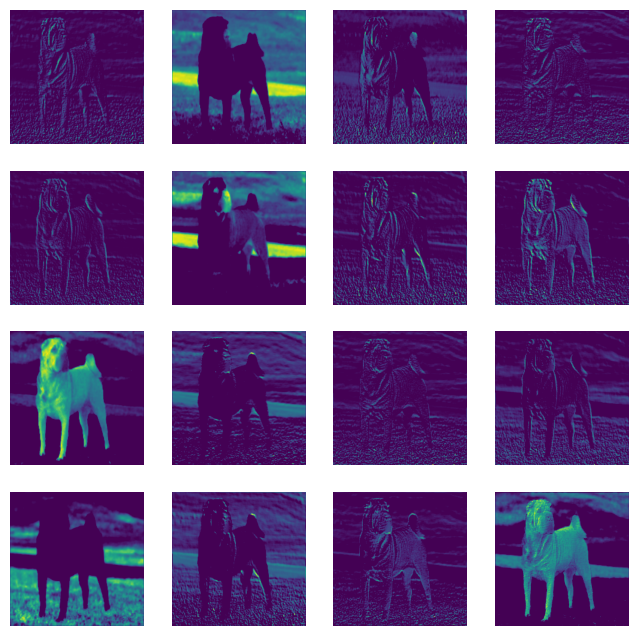

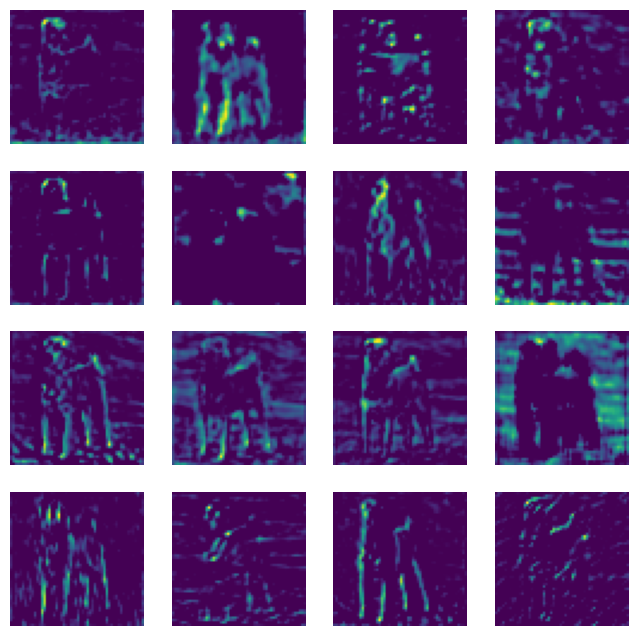

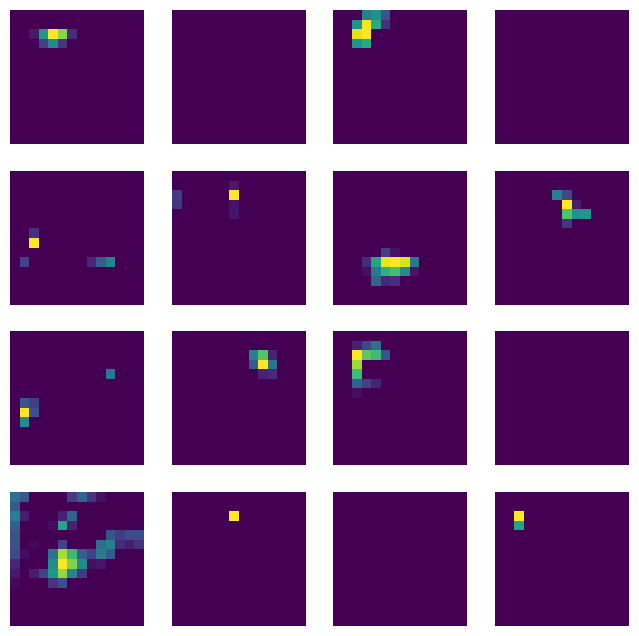

All feature map images saved in Lab_2.1/output folder!


In [10]:
# Save feature map visualizations in output folder
output_folder = "Lab_2.1/output"

for i, fmap in enumerate(feature_maps):
    plt.figure(figsize=(8, 8))

    # Show first 16 filters in 4x4 grid
    for j in range(16):
        plt.subplot(4, 4, j+1)
        plt.imshow(fmap[0, :, :, j], cmap='viridis')
        plt.axis('off')

    # Save image to output folder
    save_path = f"{output_folder}/feature_map_layer_{i+1}.png"
    plt.savefig(save_path)
    plt.show()

print("All feature map images saved in Lab_2.1/output folder!")

In [13]:
explanation = """
Early Layer (block1_conv1):
This layer detects basic features like edges, lines, and simple textures in the image.

Middle Layer (block3_conv3):
This layer captures more complex patterns such as textures and object parts.

Deep Layer (block5_conv3):
This layer detects high-level features and complex shapes representing the object.
"""
print(explanation)


Early Layer (block1_conv1):
This layer detects basic features like edges, lines, and simple textures in the image.

Middle Layer (block3_conv3):
This layer captures more complex patterns such as textures and object parts.

Deep Layer (block5_conv3):
This layer detects high-level features and complex shapes representing the object.



In [14]:
explanation = """
Lab 2.1: Understanding CNN Layers with VGG16

Step 1: I loaded a pre-trained VGG16 model with ImageNet weights and printed the model summary to observe all CNN layers.

Step 2: I selected three layers from different depths: block1_conv1 (early), block3_conv3 (middle), and block5_conv3 (deep) to analyze feature extraction at different levels.

Step 3: I uploaded a dog image, resized it to 224x224, and preprocessed it using VGG16 preprocessing.

Step 4: I passed the image through the feature extraction model to generate feature maps from the selected layers.

Step 5: I visualized the first 16 filters from each layer in a 4x4 grid and saved the outputs in the Lab_2.1/output folder.

Layer Observations:
- Early Layer (block1_conv1): Detects simple features like edges, lines, and basic textures.
- Middle Layer (block3_conv3): Detects more complex patterns such as textures and shapes.
- Deep Layer (block5_conv3): Detects high-level features and complex object representations.
"""

print(explanation)


Lab 2.1: Understanding CNN Layers with VGG16

Step 1: I loaded a pre-trained VGG16 model with ImageNet weights and printed the model summary to observe all CNN layers.

Step 2: I selected three layers from different depths: block1_conv1 (early), block3_conv3 (middle), and block5_conv3 (deep) to analyze feature extraction at different levels.

Step 3: I uploaded a dog image, resized it to 224x224, and preprocessed it using VGG16 preprocessing.

Step 4: I passed the image through the feature extraction model to generate feature maps from the selected layers.

Step 5: I visualized the first 16 filters from each layer in a 4x4 grid and saved the outputs in the Lab_2.1/output folder.

Layer Observations:
- Early Layer (block1_conv1): Detects simple features like edges, lines, and basic textures.
- Middle Layer (block3_conv3): Detects more complex patterns such as textures and shapes.
- Deep Layer (block5_conv3): Detects high-level features and complex object representations.

